# 1. 강의영상 

{{<video ???? >}}

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.model_selection
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [2]:
np.random.randn(43052)
n_balance = 10 
toeic = np.random.randint(0,199,size=5000)*5
gpa = np.random.randint(100,450,size=5000)/100
u = toeic * 8/995 + gpa * 10/4.5
u = u - np.mean(u)
v = np.exp(u)/(1+np.exp(u))
employment = np.random.binomial(n=1,p=v)
df = pd.DataFrame({
'toiec':toeic,
'gpa':gpa,
'employment':employment
})
df_balance = pd.DataFrame((np.random.randn(5000,n_balance)).reshape(5000,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)]) > 0
df = pd.concat([df,df_balance],axis=1).assign(employment = lambda df: df.employment.map({0:'No',1:'Yes'}))
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [3]:
df_train

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,165,1.38,No,False,True,False,True,False,True,False,False,True,False
2162,735,2.44,Yes,False,False,False,False,False,True,False,True,True,False
2396,135,2.98,No,True,True,False,True,False,True,False,True,False,True
4768,805,1.86,No,False,False,True,True,True,True,False,True,True,True
2271,185,1.97,No,True,False,True,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,95,3.63,Yes,False,True,False,True,True,False,True,False,True,False
466,495,2.09,No,True,True,False,False,True,False,False,True,True,False
3092,960,4.29,Yes,False,True,True,False,True,True,False,True,True,True
3772,375,2.86,No,True,True,True,True,True,False,False,True,True,True


# 4. 적합 

In [4]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'employment')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)
yyhat = predictr.predict(df_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_195640/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_195640/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1585.62 GB / 1887.51 GB (84.0%)
Train Data Rows:    1500
Train Data Columns: 12
Label Column: employment
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value repr

In [5]:
predictr.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.826667,0.049673,3.899518,0.001024,0.568280,2,True,14
1,CatBoost,0.823333,0.002378,3.325201,0.002378,3.325201,1,True,7
2,RandomForestEntr,0.820000,0.077597,0.509793,0.077597,0.509793,1,True,6
3,LightGBMLarge,0.816667,0.001998,2.172234,0.001998,2.172234,1,True,13
4,LightGBMXT,0.816667,0.002532,3.407431,0.002532,3.407431,1,True,3
5,RandomForestGini,0.816667,0.080121,0.610838,0.080121,0.610838,1,True,5
6,LightGBM,0.810000,0.002109,0.505123,0.002109,0.505123,1,True,4
7,XGBoost,0.806667,0.004611,0.940170,0.004611,0.940170,1,True,11
8,NeuralNetFastAI,0.806667,0.008672,2.453271,0.008672,2.453271,1,True,10
9,ExtraTreesGini,0.806667,0.079068,0.540996,0.079068,0.540996,1,True,8


# 5. 해석 및 시각화 

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
employment,1500,2,Yes,761,object,,,object,


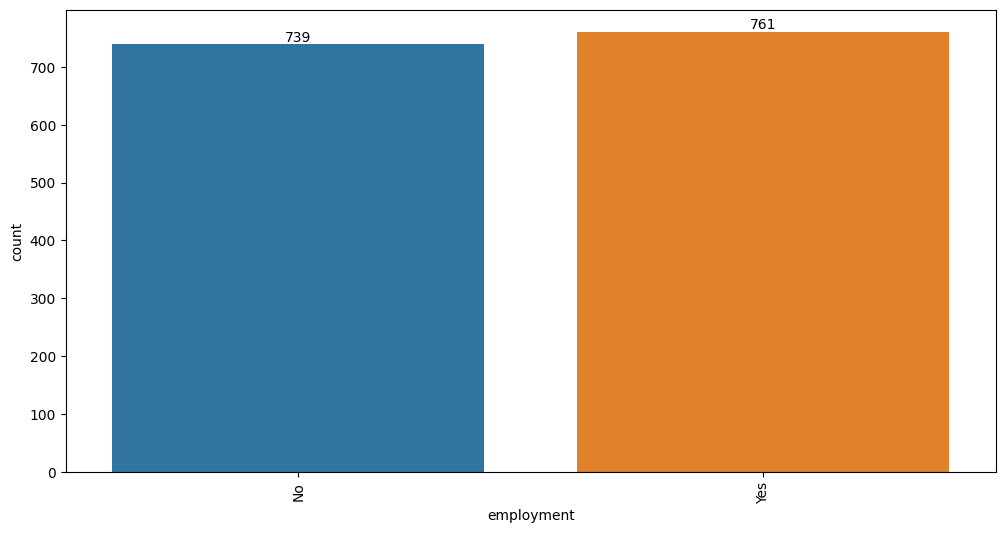

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `employment` >= `0.5`**

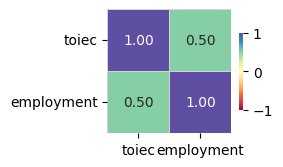

**Feature interaction between `toiec`/`employment` in `train_data`**

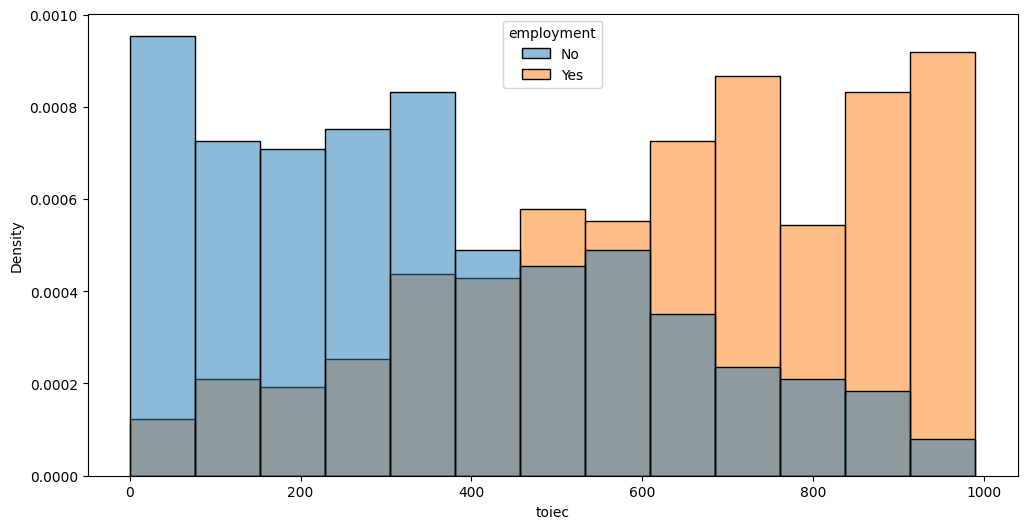

In [282]:
auto.target_analysis(
    train_data=df_train, 
    label='employment',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_131659/"


### Model Prediction for employment

Using validation data for `Test` points

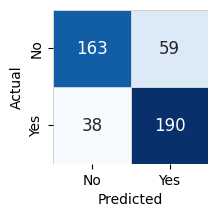

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.784444,0.819048,0.001048,0.002229,0.815803,0.001048,0.002229,0.815803,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
gpa,0.166222,0.013090,0.000005,5,0.193175,0.139269
toiec,0.127111,0.008374,0.000002,5,0.144353,0.109869
balance2,0.011111,0.005879,0.006708,5,0.023217,-0.000995
balance8,0.009333,0.000994,0.000015,5,0.011380,0.007287
balance4,0.006222,0.006555,0.050519,5,0.019718,-0.007274
balance9,0.005778,0.003718,0.012741,5,0.013434,-0.001879
balance5,0.005333,0.004037,0.020897,5,0.013645,-0.002979
balance7,0.001778,0.003296,0.147128,5,0.008564,-0.005009
balance3,-0.000444,0.001859,0.689346,5,0.003384,-0.004273
balance0,-0.001333,0.003370,0.786841,5,0.005606,-0.008273


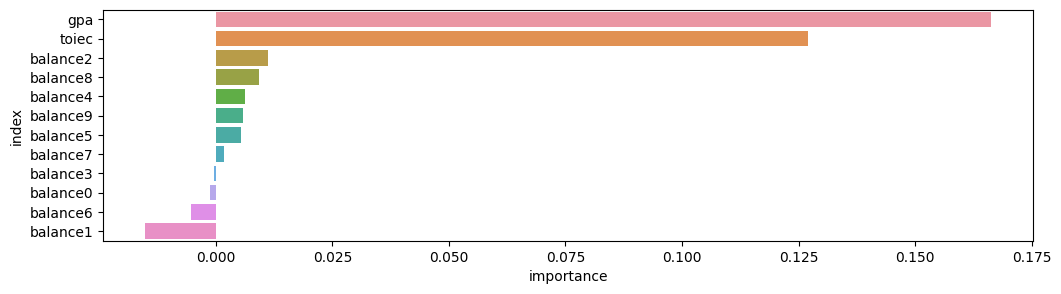

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
4586,135,2.57,True,True,True,True,False,False,False,False,False,False,Yes,0.631605,0.368395,0.263209
2675,690,2.70,False,False,False,False,True,False,True,True,True,False,No,0.370955,0.629045,0.258090
46,710,2.72,False,False,False,False,True,False,True,True,False,True,No,0.374433,0.625567,0.251134
2054,490,1.92,True,True,False,False,False,False,True,True,False,False,Yes,0.621921,0.378079,0.243843
635,475,1.32,False,True,True,True,False,True,False,False,False,True,Yes,0.618619,0.381381,0.237238
3297,610,4.26,False,True,True,True,True,False,True,False,True,False,No,0.385972,0.614028,0.228056
2000,710,2.69,True,True,True,False,False,False,False,True,False,True,No,0.401345,0.598655,0.197309
4556,265,2.48,False,True,True,False,True,True,False,True,False,False,Yes,0.589588,0.410412,0.179176
2736,555,3.19,False,False,True,False,False,True,True,False,False,True,No,0.411065,0.588935,0.177870
2961,585,3.11,False,False,True,False,False,False,True,False,True,False,No,0.413114,0.586886,0.173772


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
924,880,1.08,True,False,True,True,False,True,True,True,False,False,No,0.499017,0.500983,0.001966
3056,60,3.78,True,True,False,False,False,False,True,False,True,False,No,0.498953,0.501047,0.002094
853,430,3.54,True,False,True,True,True,True,False,True,True,True,Yes,0.501092,0.498908,0.002183
2143,880,1.61,False,True,False,True,True,True,False,True,False,True,Yes,0.501756,0.498244,0.003511
3726,730,1.97,False,False,True,False,False,False,False,True,False,True,No,0.497156,0.502844,0.005687
3234,315,3.25,False,True,False,False,True,True,True,True,False,True,No,0.496464,0.503536,0.007072
616,535,2.55,True,False,False,False,True,True,True,False,True,True,No,0.495745,0.504255,0.008510
2568,50,4.43,False,False,False,False,False,True,True,False,True,False,No,0.494524,0.505476,0.010953
126,95,3.96,False,True,True,True,True,False,False,False,False,True,Yes,0.505630,0.494370,0.011259
854,200,3.83,True,True,True,True,True,False,False,True,False,True,No,0.492740,0.507260,0.014520


In [283]:
auto.quick_fit(
    train_data = df_train, 
    label='employment',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석 

In [285]:
predictr.predict_proba(df_train.iloc[[0]])

,No,Yes
4431,0.960422,0.039578


,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,100,1.22,No,1,1,0,1,1,0,1,1,0,1


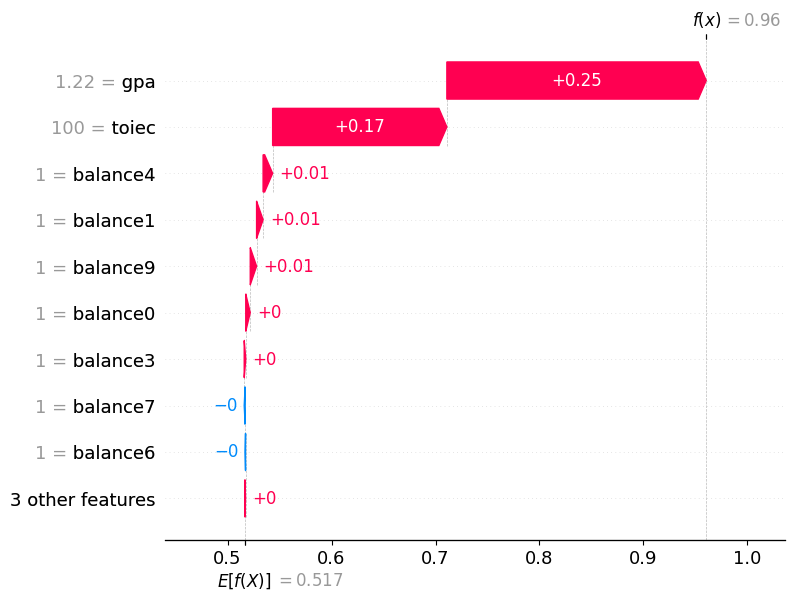

In [286]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[0]]*1
)